In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Default theme
sns.set_theme(palette='tab10',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
df=pd.read_csv("/data/predictive_maintenance.csv")

df = df.drop(["UDI","Product ID"],axis=1)
df.sample(6).style.set_properties(
    **{
        'background-color': 'purple',
        'color': 'white',
        'border-color': 'black'
    })

In [5]:
display(df.shape)
display(df.size)

(10000, 8)

80000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [7]:
df.describe().style.background_gradient(cmap="magma")

# Basic transformation

In [8]:
## Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ] 

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [9]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

Type  Air temperature [°C]  Process temperature [°C]  \
1924    L                 25.75                     35.55   
6491    L                 28.65                     37.85   
2815    M                 27.95                     37.25   
7041    L                 28.45                     38.35   
2291    M                 27.35                     36.65   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
1924                    1353         50.7               13       0   
6491                    1468         52.7              178       0   
2815                    1569         31.6              124       0   
7041                    1470         37.7               98       0   
2291                    1886         20.9              117       0   

     Failure Type  Temperature difference [°C]  
1924   No Failure                          9.8  
6491   No Failure                          9.2  
2815   No Failure                          9.3  
7041   No Failure                          9.9  
2291   No Failure                          9.3

In [10]:
df.describe().style.background_gradient(cmap="magma")

# Exploratory Data Analysis

findfont: Font family ['Lucida Calligraphy'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lucida Calligraphy'] not found. Falling back to DejaVu Sans.


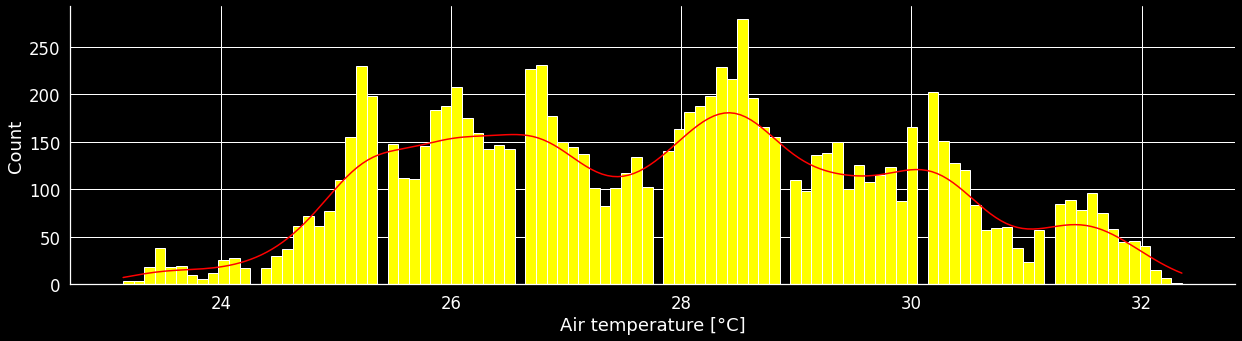

In [11]:
sns.displot(data=df, x="Air temperature [°C]", kde=True, bins = 100,color = "red", 
            facecolor = "yellow",height = 5, aspect = 3.5);

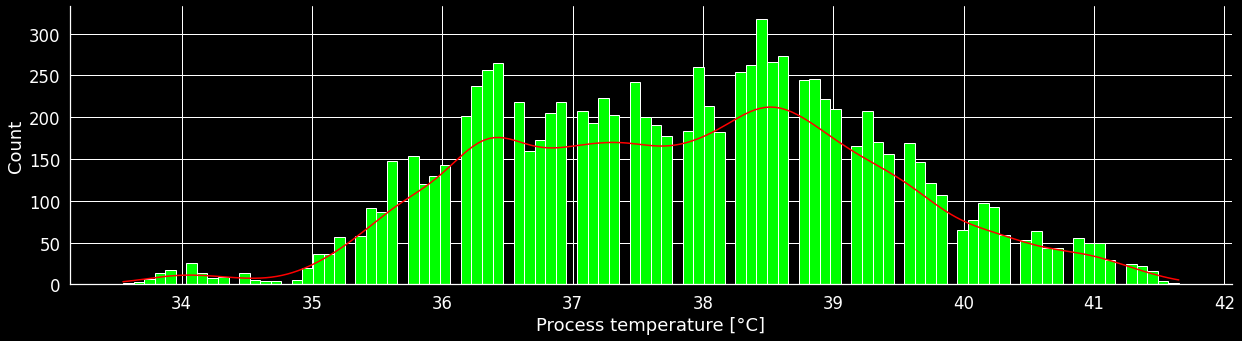

In [12]:
sns.displot(data=df, x="Process temperature [°C]", kde=True, bins = 100,color = "red", 
            facecolor = "lime",height = 5, aspect = 3.5);

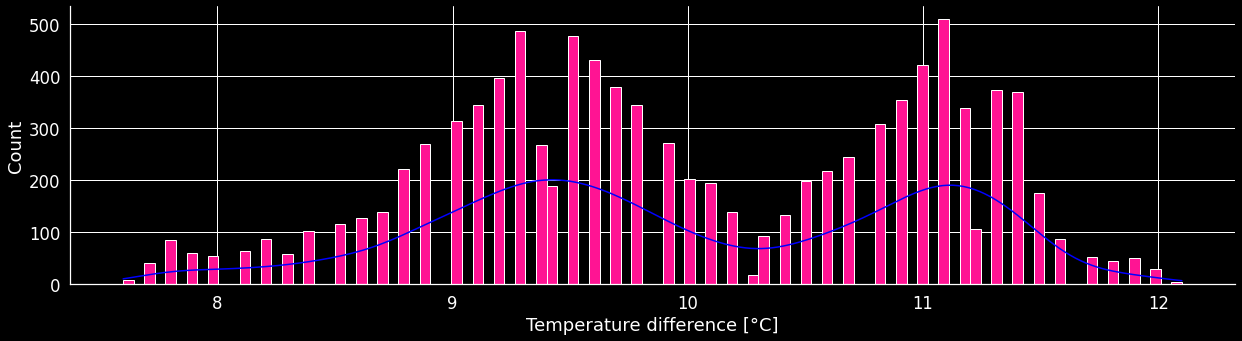

In [13]:
sns.displot(data=df, x="Temperature difference [°C]", kde=True, bins = 100,color = "blue", 
            facecolor = "DeepPink",height = 5, aspect = 3.5);

In [14]:
for col in df[['Type','Target','Failure Type']]:
    print("----------" + col + "----------")
    print(df[col].value_counts()) 

----------Type----------
L    6000
M    2997
H    1003
Name: Type, dtype: int64
----------Target----------
0    9661
1     339
Name: Target, dtype: int64
----------Failure Type----------
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lucida Calligraphy'] not found. Falling back to DejaVu Sans.


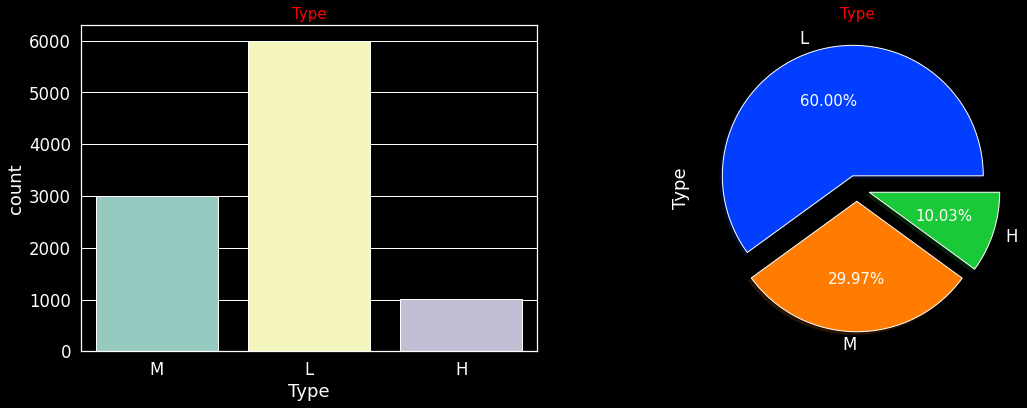

In [15]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
#ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True,colors=sns.color_palette('bright'));
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman');

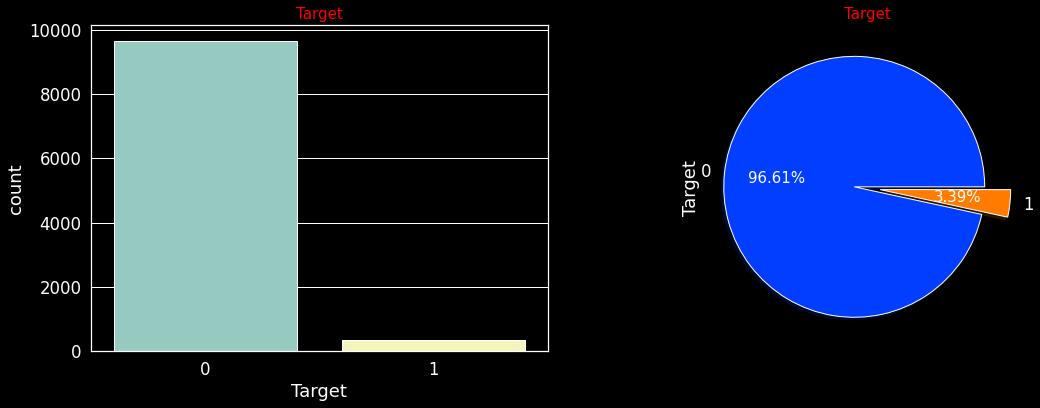

In [16]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
plt.title("Target", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True,colors=sns.color_palette('bright'));
ax.set_title(label = "Target", fontsize = 20,color='Red',font='Times New Roman');

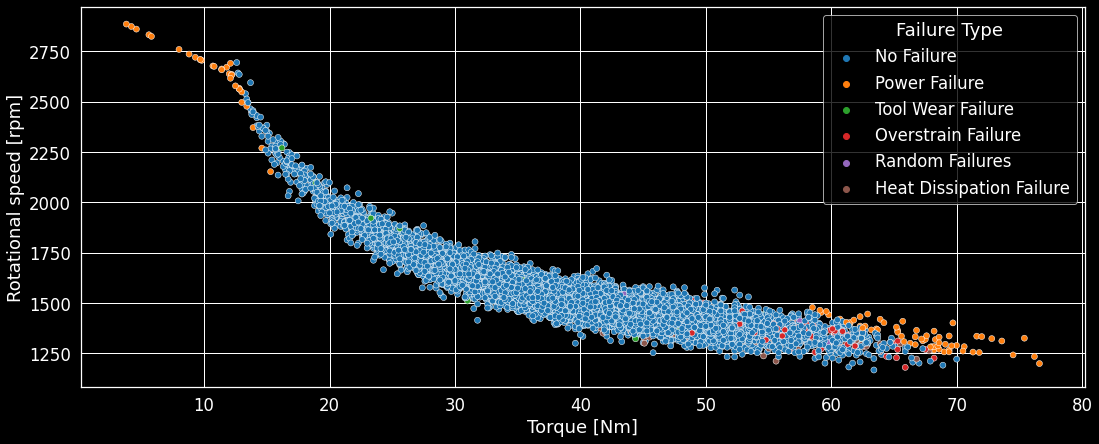

In [17]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");

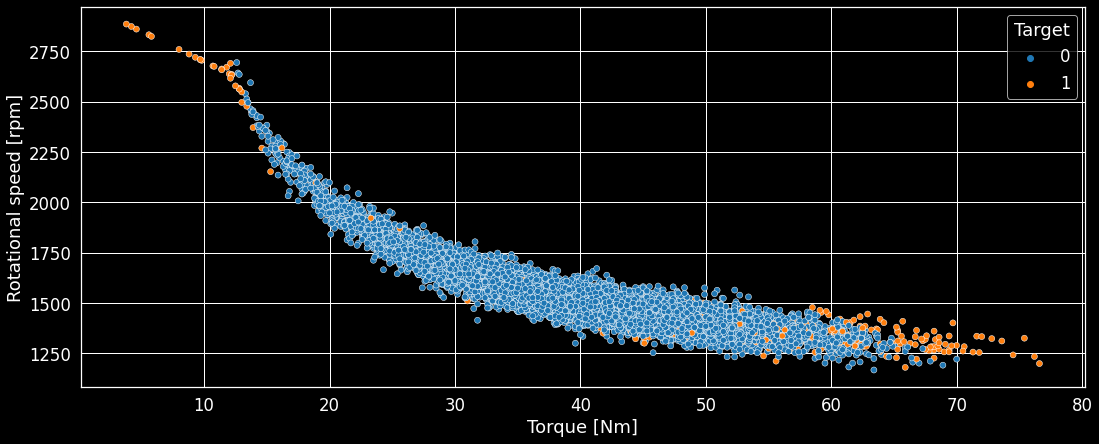

In [18]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");

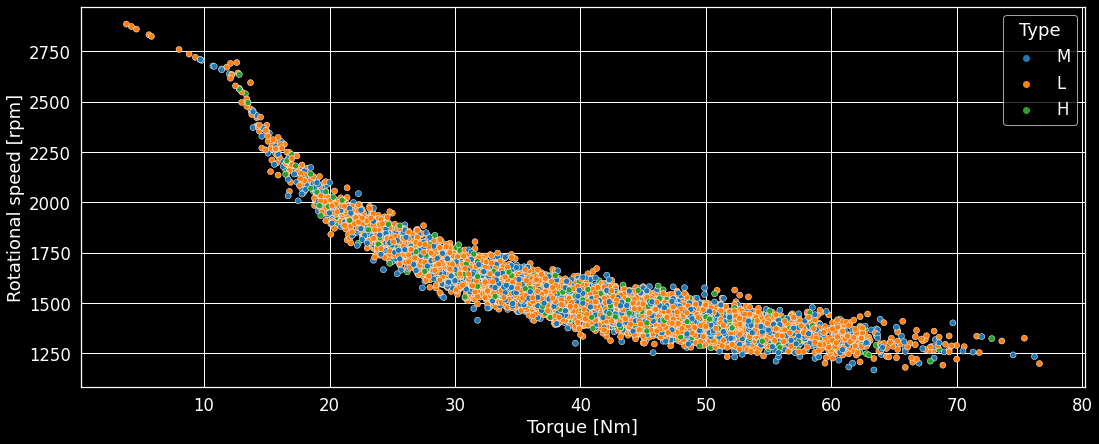

In [19]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

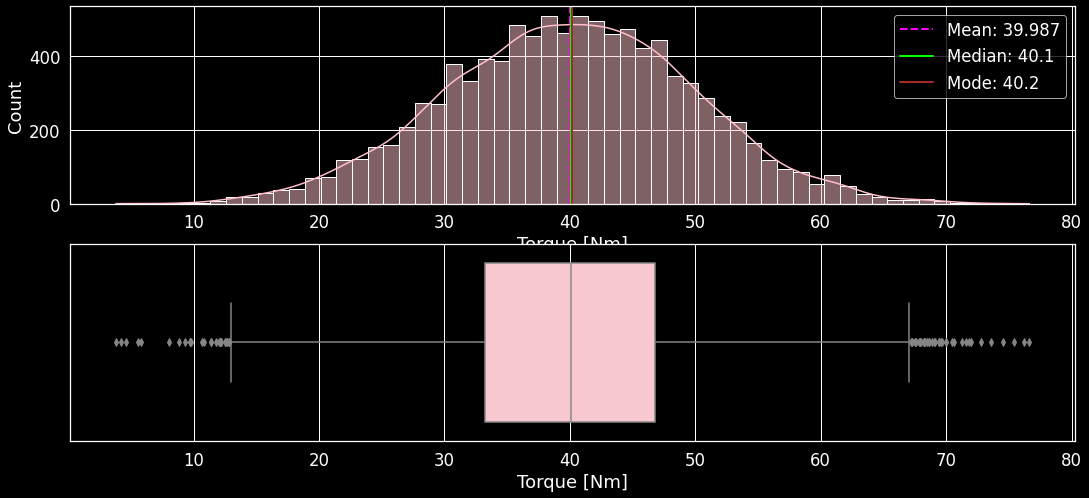

In [20]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='pink')

    ax[0].axvline(x = df[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='pink')
    
    plt.show()

plot_hist('Torque [Nm]')

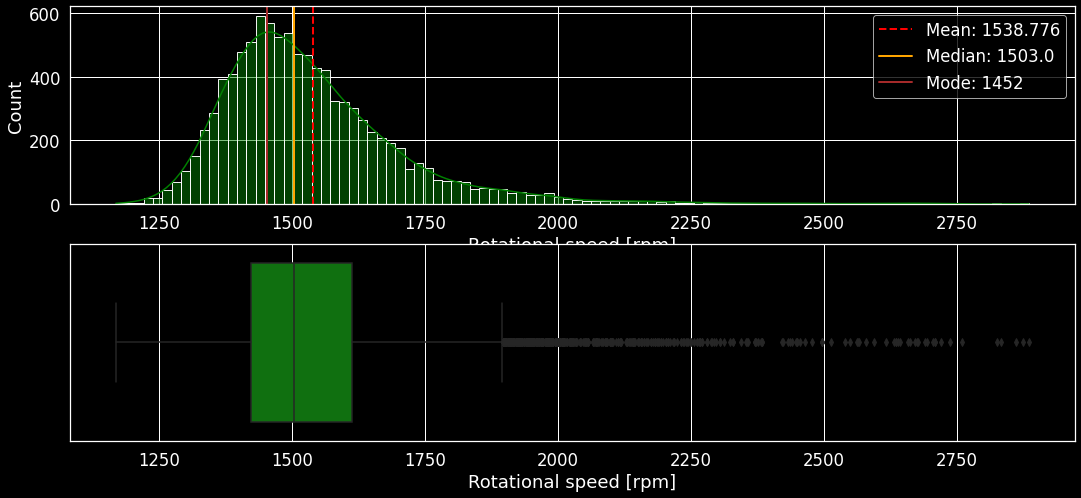

In [21]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='green')

    ax[0].axvline(x = df[feature].mean(), color = 'red', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'orange', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist('Rotational speed [rpm]')


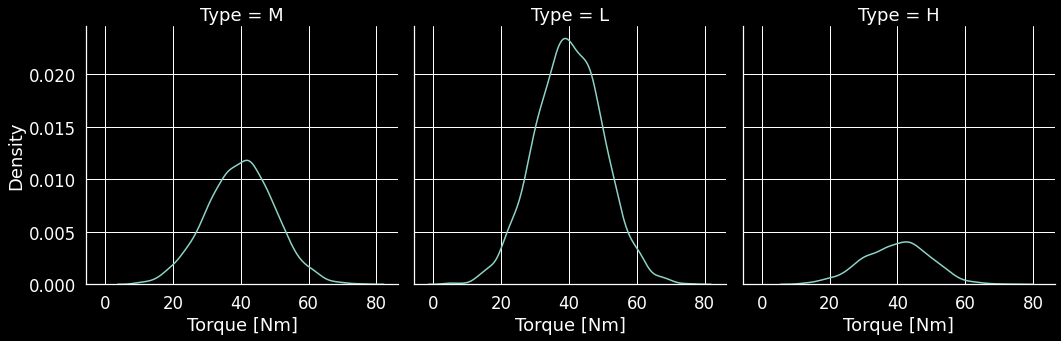

In [22]:
sns.displot(data=df, x="Torque [Nm]", col="Type", kind="kde");

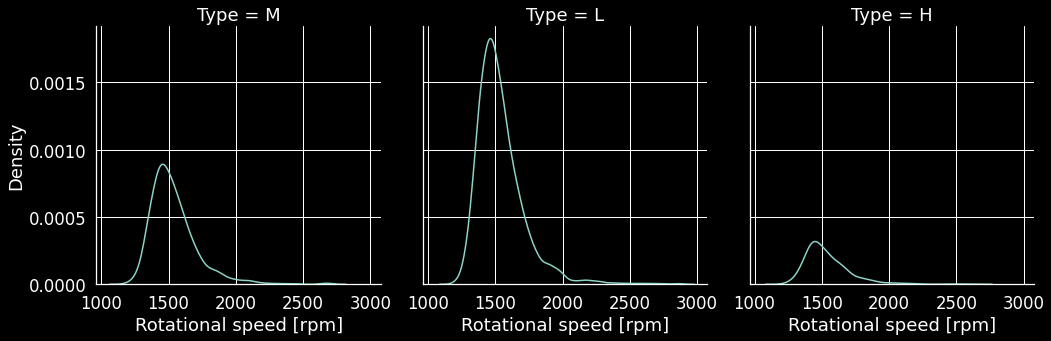

In [23]:
sns.displot(data=df, x="Rotational speed [rpm]", col="Type", kind="kde");

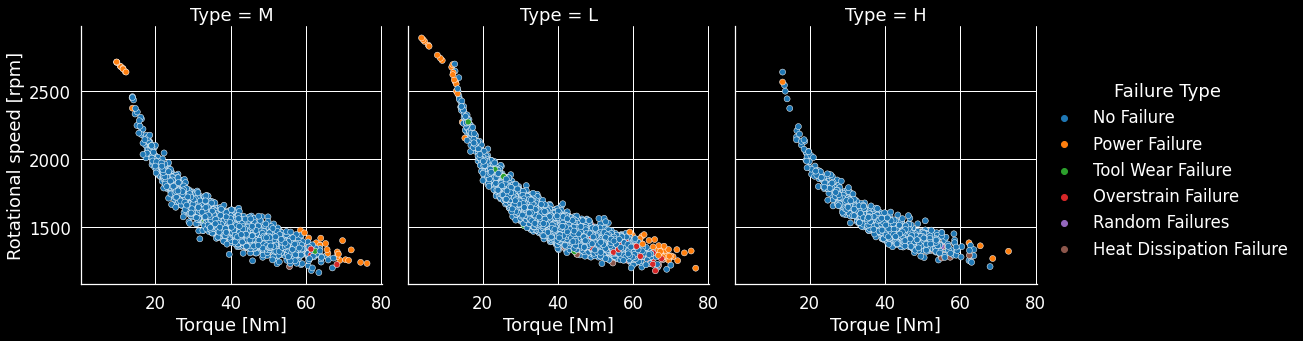

In [24]:
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10');